<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/Glove%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd

In [19]:
sent_token=pd.read_csv("/content/drive/MyDrive/textcode1.csv",encoding='euc-kr')

In [20]:
sent_token

,IPC,eng
0,A01B,SOIL WORKING IN AGRICULTURE OR FORESTRY PARTS...
1,A01C,PLANTING SOWING FERTILISING parts details ...
2,A01D,HARVESTING MOWING
3,A01F,THRESHING combines A D BALING OF STRAW ...
4,A01G,HORTICULTURE CULTIVATION OF VEGETABLES FLOWE...
...,...,...
645,H05F,STATIC ELECTRICITY NATURALLY OCCURRING ELECTR...
646,H05G,X RAY TECHNIQUE apparatus for radiation diagn...
647,H05H,PLASMA TECHNIQUE ion beam tubes H J magne...
648,H05K,PRINTED CIRCUITS CASINGS OR CONSTRUCTIONAL DE...


In [21]:
text=sent_token['eng'] #데이터 확인
IPC=sent_token['IPC']

In [22]:
pip install glove_python_binary

In [23]:
from nltk.tokenize import word_tokenize #토큰화
from nltk.tokenize import WordPunctTokenizer
from nltk import sent_tokenize
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import TreebankWordTokenizer
import pandas as pd
import numpy as np
import nltk
import nltk.corpus
nltk.download('punkt')
from nltk import corpus
from glove import Corpus, Glove

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
b=text.values.tolist()

In [25]:
a = []    # 빈 리스트 생성
 
for i in range(0,650):
    line =  []
    f=word_tokenize(b[i])             # 안쪽 리스트로 사용할 빈 리스트 생성
    for j in range(1):
        line.append(f)     # 안쪽 리스트에 0 추가
    a.append(f)

In [26]:
corpus = Corpus()
corpus.fit(a, window=100)

In [27]:
# model
glove = Glove(no_components=128, learning_rate=0.01)     # 0.05
%time glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=False)    # Wall time: 8min 32s
glove.add_dictionary(corpus.dictionary)

CPU times: user 37.3 s, sys: 200 ms, total: 37.5 s
Wall time: 28.2 s


In [28]:
glove.save('/glove_w20_epoch50.model')

In [29]:
glove_model = Glove.load('/glove_w20_epoch50.model')

In [30]:
word_dict = {}
for word in  glove_model.dictionary.keys():
    word_dict[word] = glove_model.word_vectors[glove_model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

[Success !] Lengh of word dict... :  4234


In [31]:
word_dict['PRODUCTION']

array([ 0.00739017, -0.0147621 , -0.02195022, -0.00258555,  0.02106509,
        0.01705795,  0.01381031, -0.01718286,  0.01188317,  0.00715121,
        0.00114261,  0.0261395 , -0.00831052,  0.0244577 , -0.01745337,
        0.00353841, -0.01697508,  0.02570613,  0.02436211,  0.01927267,
        0.01221248, -0.02412911, -0.01523895, -0.00980209,  0.00598922,
       -0.01627337, -0.02748165, -0.02372863, -0.01564328,  0.00897543,
       -0.00423082, -0.01642251,  0.00335507,  0.01392976,  0.01929564,
        0.02421717, -0.02576369,  0.00161022,  0.01912005,  0.0221816 ,
       -0.01746068, -0.01033805,  0.0193737 , -0.01216438,  0.00592665,
       -0.02499987,  0.02424836,  0.00644087, -0.01466821, -0.02853019,
       -0.02649889,  0.02215424, -0.00172872,  0.00779928,  0.02573503,
        0.00389281,  0.01378317, -0.00091161,  0.01304854,  0.02126286,
       -0.02956834,  0.01714278,  0.01724831, -0.020056  ,  0.01895155,
       -0.00992925,  0.00636298, -0.0225744 ,  0.0110617 ,  0.01

In [32]:
import pandas as np

In [33]:
def sent2vec_glove(tokens, embedding_dim=128):
    '''문장 token 리스트를 받아서 임베딩 시킨다.'''
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix

In [34]:
# sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
import numpy as np

In [36]:
sentence_glove = sent2vec_glove(text)
sentence_glove.shape

(650, 128)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 650 samples in 0.000s...
[t-SNE] Computed neighbors for 650 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 650 / 650
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.680130
[t-SNE] KL divergence after 1000 iterations: 0.521216
Embedding shape 확인 (650, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


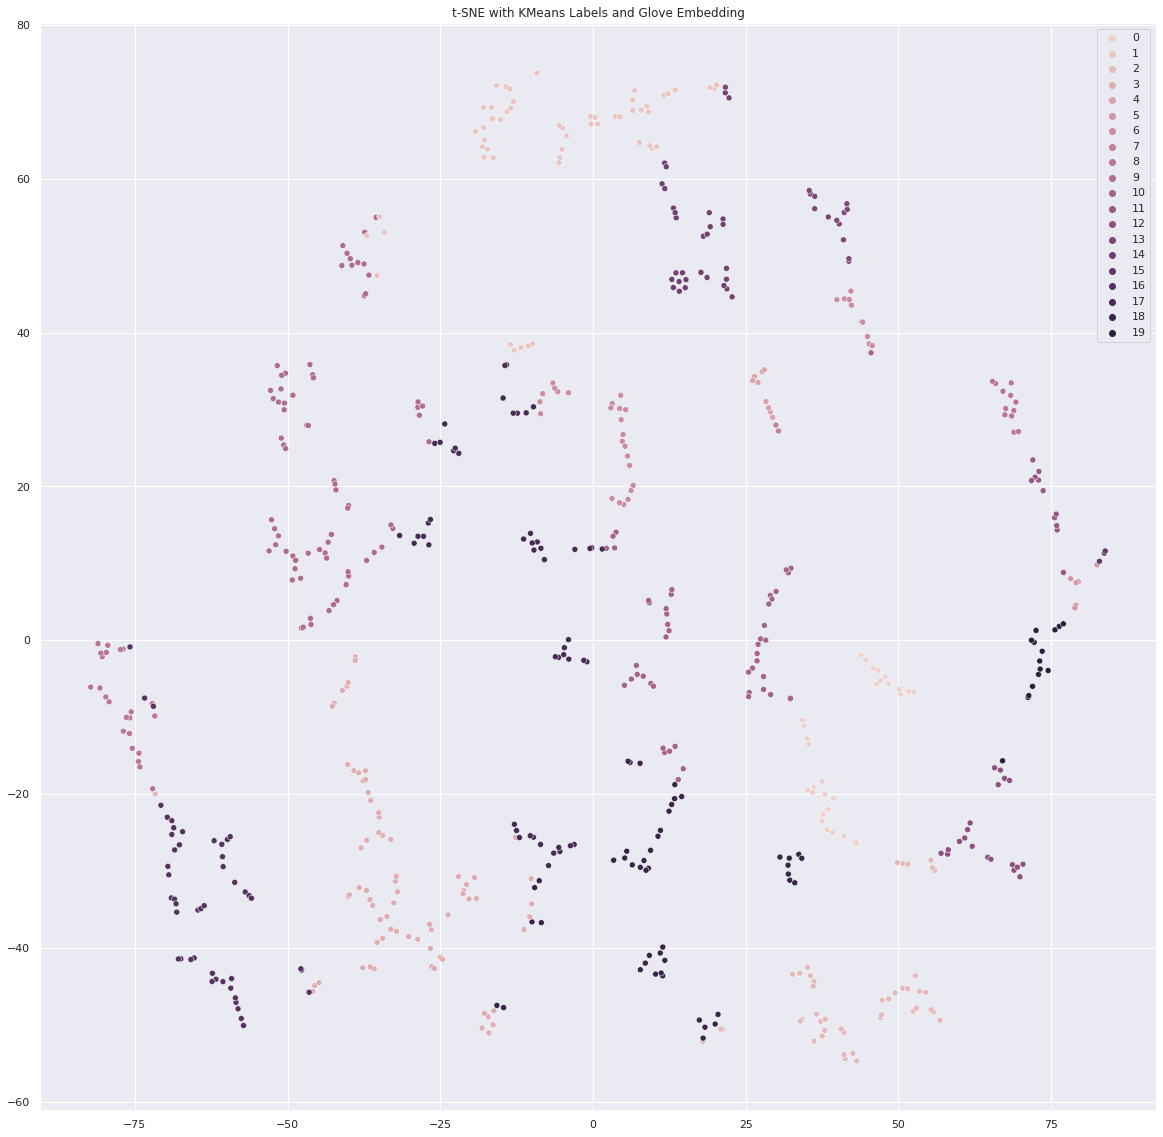

In [49]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=2021)
y_pred = kmeans.fit_predict(sentence_glove)

# tsne
tsne = TSNE(verbose=1, perplexity=5, random_state=2021)     # perplexity : 유사정도
X_embedded = tsne.fit_transform(sentence_glove)
print('Embedding shape 확인', X_embedded.shape)

# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
palette = sns.hls_palette(10, l=.4, s=.9) 
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full')     # kmeans로 예측

plt.title('t-SNE with KMeans Labels and Glove Embedding')
plt.savefig("/t-sne_question_glove_embedding.png")
plt.show()

In [38]:
# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from scipy.spatial.distance import cdist

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)


for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(sentence_glove)
    k_means.fit(sentence_glove)
    distortions.append(sum(np.min(cdist(sentence_glove, k_means.cluster_centers_, 'euclidean'), axis=1)) / sentence_glove.shape[0])
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

KeyboardInterrupt: ignored

In [50]:
g=pd.DataFrame(X_embedded)
g.to_csv("govledata.csv")